# Introduction to Convolutional Layers

### Nhung Le

### Goals:
- Understand Convolution layers 
- Implement them using PyTorch.

**Question:** What is a convolution operation?

In [2]:
#Import common dependencies
import torch
from torch import nn

In [3]:
if torch.cuda.is_available==True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

## Convolution Demo

https://cs231n.github.io/convolutional-networks/

- Input: $W_{input}$ x $H_{input}$ x $D_input$
- Hyperparameters:
    - Number of filters: K
    - Spatial extent: F
    - Stride: S
    - Amount of zero padding: P
- Output:
    - $W_{output} = (W_{input} - F + 2P)/S + 1$ 
    - $H_{output}$ = $(H_{input} - F + 2P)/S + 1$
    - $D_{output} = K$

In [35]:
def get_n_params(model):
    return sum(p.numel() for p in model.parameters())

## 1D Convolutions

In [10]:
#Question: What would be the desired input shape for the 1D Convolution layer?
desired_shape = (3, 10)

#Generate a random tensor of the desired shape
x_1d = torch.rand(desired_shape).to(device)

### Knowing the module and its attributes

In [4]:
?nn.Conv1d

Init signature:
nn.Conv1d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    dilation=1,
    groups=1,
    bias=True,
    padding_mode='zeros',
)
Docstring:     
Applies a 1D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, L)` and output :math:`(N, C_{\text{out}}, L_{\text{out}})` can be
precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{in} - 1} \text{weight}(C_{\text{out}_j}, k)
    \star \text{input}(N_i, k)

where :math:`\star` is the valid `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`L` is a length of signal sequence.

* :attr:`stride` controls the stride for the cross-correlation, a single
  number or a one-element tuple.

* :attr:`padding` controls the amount of implicit zero-paddings on both sides

Before we create a Convolution layer and see how that works, let's understand what parameters does our 1D convolution layer need and what would be the expected output?

### Questions
- Input channels?
- Output channels?
- Kernel/Filter Size?
- Stride?
- Padding?

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

#### Instantiate a 1D Convolution Layer

In [13]:
conv1d_layer = nn.Conv1d(in_channels= 3,  #Input channels
                         out_channels= 5, #Output channels
                         kernel_size=3, #Kernel/Filter size
                         stride= 1, #Stride
                         padding= 1, #Padding; In this case it's zero padding
                         bias= True
                        ) 

#### Number of Parameters in the Convolution Layer

In [ ]:
print('Number of parameters in our conv1d_layer is: {}'.format(get_n_params(conv1d_layer)))

#### Output

In [15]:
out_1d = conv1d_layer(x_1d.unsqueeze(0))

### Question: Shape of the output??

In [16]:
out_1d.shape

torch.Size([1, 5, 10])

## 2D Convolutions

In [17]:
#Question: What would be the desired input shape for the 2D Convolution layer?
desired_shape = (3, 20, 10)

#Generate a random tensor of the desired shape
x_2d = torch.rand(desired_shape).to(device)

### Knowing the module

In [18]:
?nn.Conv2d

Init signature:
nn.Conv2d(
    in_channels: int,
    out_channels: int,
    kernel_size: Union[int, Tuple[int, int]],
    stride: Union[int, Tuple[int, int]] = 1,
    padding: Union[int, Tuple[int, int]] = 0,
    dilation: Union[int, Tuple[int, int]] = 1,
    groups: int = 1,
    bias: bool = True,
    padding_mode: str = 'zeros',
)
Docstring:     
Applies a 2D convolution over an input signal composed of several input
planes.

In the simplest case, the output value of the layer with input size
:math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
can be precisely described as:

.. math::
    \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
    \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)


where :math:`\star` is the valid 2D `cross-correlation`_ operator,
:math:`N` is a batch size, :math:`C` denotes a number of channels,
:math:`H` is a height of input planes in pixels

#### Instantiate a 2D Convolution Layer

In [19]:
conv2d_layer = nn.Conv2d(in_channels= 3,  #Input channels
                         out_channels= 5, #Output channels
                         kernel_size=3, #Kernel/Filter size
                         stride= 1, #Stride
                         padding= 1, #Padding; In this case it's zero padding
                         bias= True
                        ) 

#### Number of Parameters in the Convolution Layer

In [40]:
print('Number of parameters in our conv2d_layer is: {}'.format(get_n_params(conv2d_layer)))

Number of parameters in our conv2d_layer is: 140


### Explanation??

#### Output

In [21]:
out = conv2d_layer(x_2d.unsqueeze(0))

### Question: Shape of the output??

In [22]:
out.shape

torch.Size([1, 5, 20, 10])

## Coding a CNN model using Pytorch with MNIST Data

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

### Get Data

In [6]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

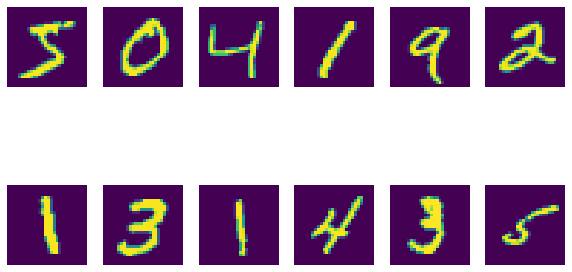

In [7]:
# show images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off');

## Models

### Fully Connected Layers (i.e., Linear)

In [4]:
class FC1Layer(nn.Module):
    def __init__(self, input_size, num_hidden, output_size):
        super(FC1Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, num_hidden), 
            nn.ReLU(), 
#             nn.Linear(num_hidden, num_hidden), 
#             nn.ReLU(), 
            nn.Linear(num_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

### CNN 

In [5]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = nn.LogSoftmax(x, dim=1)
#         x = F.log_softmax(x, dim=1)
        return x

### Training

In [32]:
accuracy_list = []

def train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

### Train on a Fully-connected network

In [58]:
n_hidden = 8 # number of hidden units

model_fnn = FC1Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn)
    test(model_fnn)

Number of parameters: 6370
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.351579
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.977028
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.559849
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.682849
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.355238
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.406074
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.518207
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.414510
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.303285
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.226175

Test set: Average loss: 0.3421, Accuracy: 9013/10000 (90%)



### Train on a CNN network

In [42]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 1):
    train(epoch, model_cnn)
    test(model_cnn)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301486
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.248618
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.159819
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.376376
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.461697
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.314557
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.203946
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.187054
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.133298
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.203926

Test set: Average loss: 0.2411, Accuracy: 9239/10000 (92%)



### Fully Connected network vs. CNN

For the same parameters, CNN out-performs FCC. Why?
- Locality of the image
- Stationarity in images

What happens when we corrupt the image so the locality and stationarity do not hold true

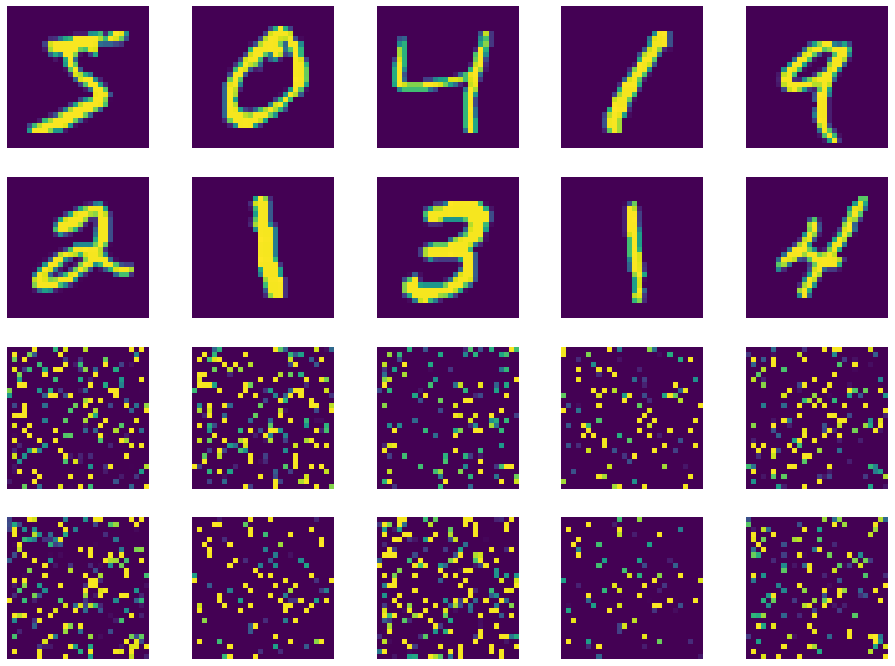

In [48]:
perm = torch.randperm(784)
# Select 784 because 784 - 28 * 28 = image size
plt.figure(figsize=(16, 12))
for i in range(10):
    image, _ = train_loader.dataset.__getitem__(i)
    # permute pixels
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, perm]
    image_perm = image_perm.view(-1, 1, 28, 28)
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.subplot(4, 5, i + 11)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')

In [50]:
n_hidden = 8    # number of hidden units

model_fnn = FC1Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn, perm)
    test(model_fnn, perm)

Number of parameters: 6370
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.309650
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.923493
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.675388
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.475300
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.333245
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.437296
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.332712
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.227889
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.248396
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.309653

Test set: Average loss: 0.3482, Accuracy: 8990/10000 (90%)



In [62]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 1):
    train(epoch, model_cnn, perm)
    test(model_cnn, perm)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.308276
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.254386
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.172802
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.769382
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.478190
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.105024
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.968546
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.587998
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.809138
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.581221

Test set: Average loss: 0.5416, Accuracy: 8323/10000 (83%)



## Feedbacks:

1. Nói thêm dataset (customized)
2. Nói thêm về dataloader
3. So sánh thêm models: KNN. 
4. Tăng thêm parameters của CNN --> cố tăng lên 98% --> để thấy CNN thực sự tốt hơn